<a href="https://colab.research.google.com/github/ggurrea/Customer-Segmentation/blob/main/C3_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Customer Segmentation

This project research question is:
A company wants to segment its customers.

I found this dataset pretty interesting because we don't truly realize how much data is being collected in our daily lives and businesses use this data to come up with better solutions to increase foot traffic in their stores.

I found this dataset on kaggle and the link can be clicked below

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**Attributes**

**People**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month


### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [ ]:
customer_df = pd.read_csv('/content/marketing_campaign 2.csv', sep="\t")

### Exploratory Data Analysis

In [ ]:
customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


As we can see Dt_customer which is supposed to be the date the customer joined the database is not formatted as DateTime

In [ ]:
nRow, nCol = customer_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2240 rows and 29 columns


In [ ]:
customer_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
customer_df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Checking for missing values

In [ ]:
customer_df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
customer_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

As we can see, income is missing has some missing values but it's little so we will drop those

In [ ]:
# removing the NA values
customer_df = customer_df.dropna()

In [ ]:
customer_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
customer_df.shape

(2216, 29)

In [ ]:
# converting `Dt_Customer` to DateTime
customer_df["Dt_Customer"] = pd.to_datetime(customer_df["Dt_Customer"])
dates = []
for i in customer_df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# Let's check who the oldest customer and newest customer in the database
print("Newest customer enrolled on record:", max(dates))
print("Oldest customer enrolled on record:", min(dates))

Newest customer enrolled on record: 2014-12-06
Oldest customer enrolled on record: 2012-01-08


Let's check the categorical features and their values in our dataset

In [ ]:
customer_df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

As we can see we have 8 different categories under Marital Status

In [ ]:
customer_df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

As we can see there are 5 different categories under Education

In [ ]:
# How old are the customers
customer_df["Age"] = 2022 - customer_df["Year_Birth"]
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41


In [ ]:
# renaming some of the columns for better understanding
customer_df = customer_df.rename(columns={"MntWines":"Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Seafood", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

In [ ]:
# creating a column for total amount for purchases
customer_df["Purchases"] = customer_df["Wines"] + customer_df["Fruits"] + customer_df["Meat"] + customer_df["Seafood"] + customer_df["Sweets"] + customer_df["Gold"]

In [ ]:
# Deriving living situation by marital status
customer_df["Living_With"] = customer_df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [ ]:
customer_df["Living_With"].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

In [ ]:
# How many children living in household
customer_df["Children"] = customer_df["Kidhome"] + customer_df["Teenhome"]

In [ ]:
# Total members in household
customer_df["Household_Size"] = customer_df["Living_With"].replace({"Alone":1, "Partner":2}) + customer_df["Children"]

In [ ]:
# Figuring out if the customer is a parent or not
customer_df["Parent"] = np.where(customer_df.Children> 0, 1, 0)

In [ ]:
# let's segment education levels to Graduate, Undergraduate, Postgraduate
customer_df["Education"] = customer_df["Education"].replace({"Graduation":"Graduate", "Basic":"Undergraduate", "2n_Cycle":"Postgraduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

I'm gonna drop Marital_Status, Dt_Customer, Z_CostContact, Z_revenue, Year_Birth, and ID as I won't need them anymore

In [ ]:
customer_df = customer_df.drop(['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'], axis=1)

In [ ]:
customer_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Seafood,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Purchases,Living_With,Children,Household_Size,Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,65,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,68,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,57,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,38,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,41,422,Partner,1,3,1


In [ ]:
customer_df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Seafood,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Purchases,Children,Household_Size,Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,2525.000000,3.000000,5.000000,1.000000


<Figure size 432x288 with 0 Axes>

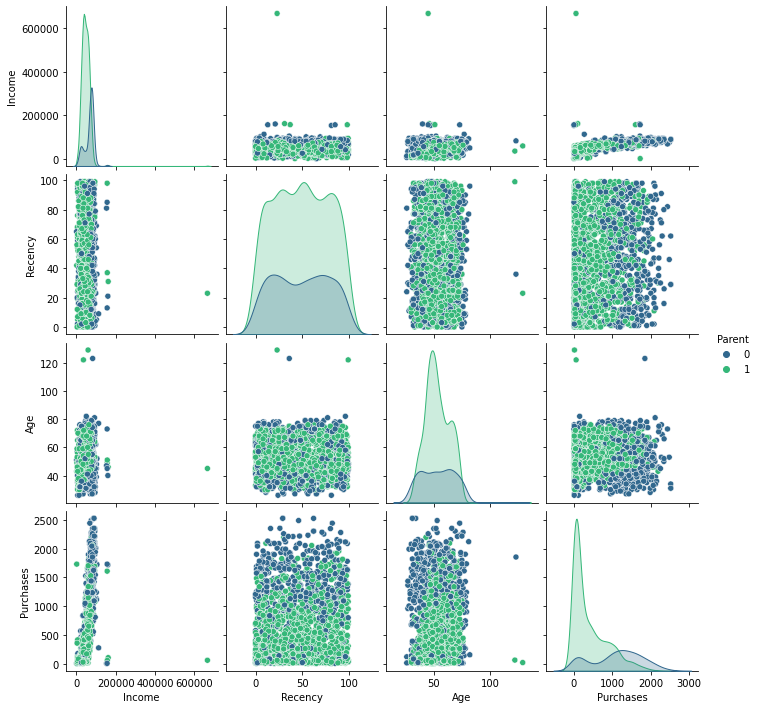

In [ ]:
plot_deez = ["Income", "Recency", "Age", "Purchases", "Parent"]
plt.figure()
sns.pairplot(customer_df[plot_deez], hue="Parent", palette="viridis")
plt.show()

This shows that there are outliers found in the INcome and Age features

In [ ]:
# Dropping the outliers by setting parameters on Age and Income
customer_df = customer_df[(customer_df["Age"]<90)]
customer_df = customer_df[(customer_df["Income"]<600000)]

<Figure size 432x288 with 0 Axes>

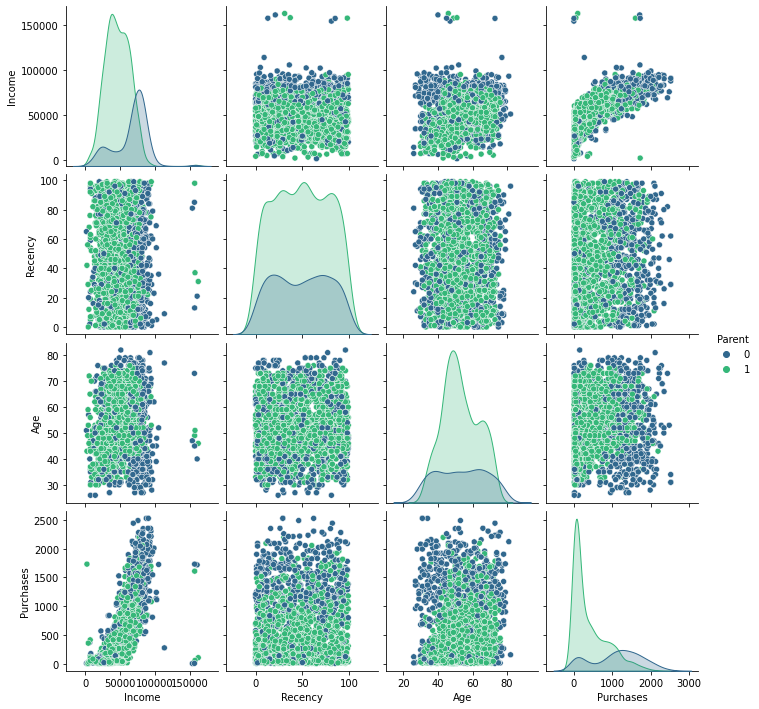

In [ ]:
plot_deez = ["Income", "Recency", "Age", "Purchases", "Parent"]
plt.figure()
sns.pairplot(customer_df[plot_deez], hue="Parent", palette="viridis")
plt.show()

That looks much better!

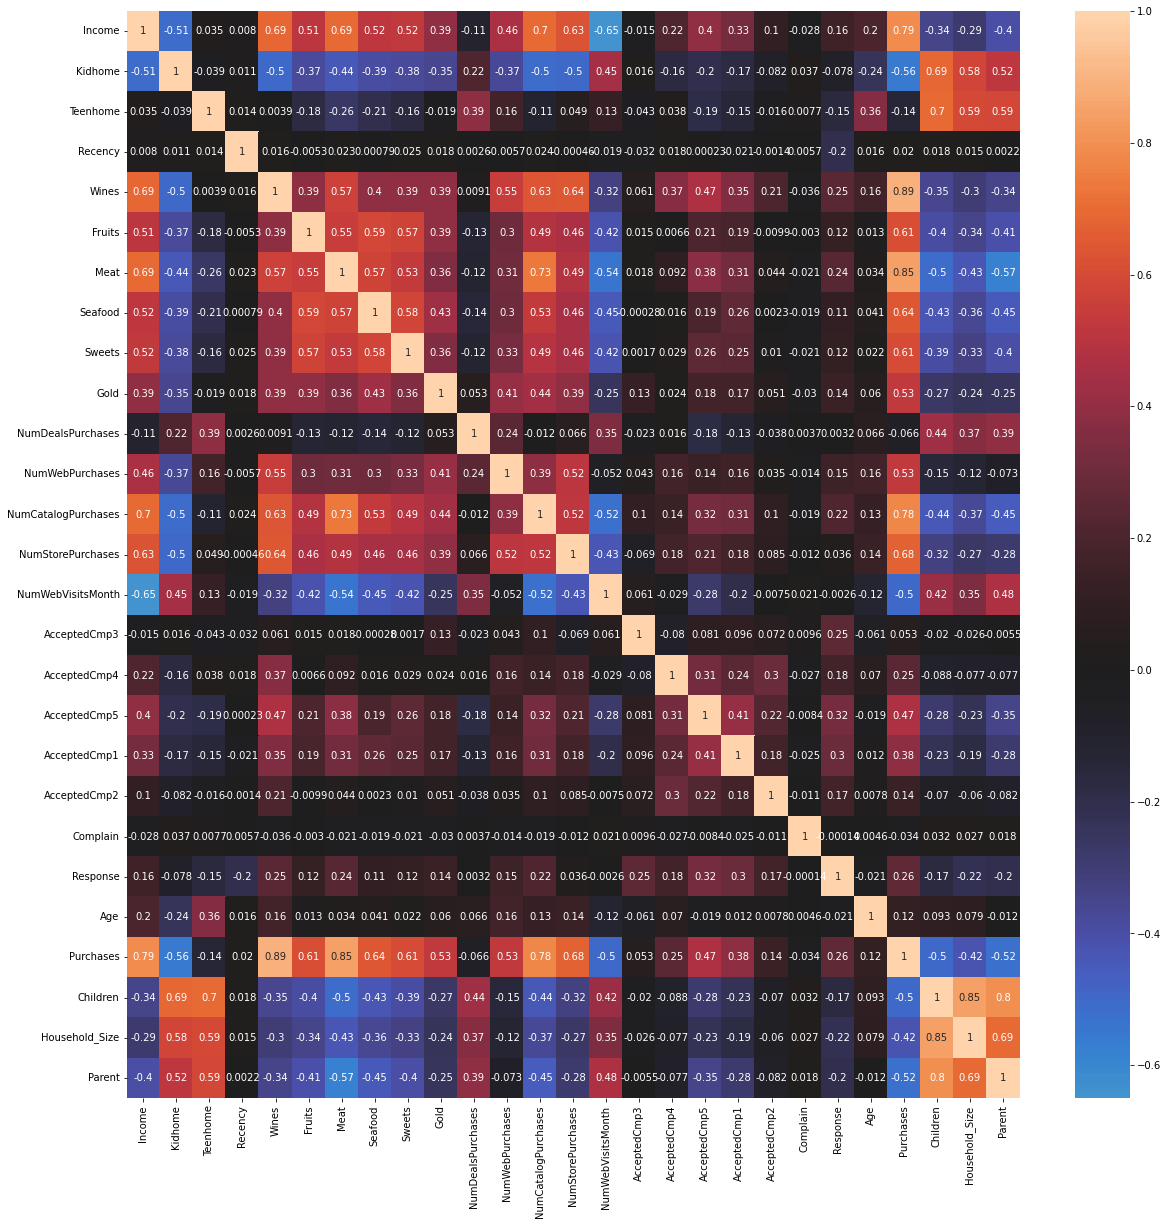

In [ ]:
# correlation matrix
cormat = customer_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cormat, annot=True, center=0)

### Data Preprocessing

Now we have to preprocess the data by performing Label encoding to the categorical features and scaling the features using StandardScaler

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Seafood              2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [ ]:
cat_var = (customer_df.dtypes == 'object')
object_cols = list(cat_var[cat_var].index)

print("These columns are the categorical features:", object_cols)

These columns are the categorical features: ['Education', 'Living_With']


In [ ]:
# Label Encoding the categorical variables
le = LabelEncoder()
for i in object_cols:
    customer_df[i]=customer_df[[i]].apply(le.fit_transform)


In [ ]:
# Duplicating the data
dup_df = customer_df.copy()
# making a subset of dataframe by dropping features on deals accepted and promos
dropit_likeitshot = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                     'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
dup_df = dup_df.drop(dropit_likeitshot, axis=1)

In [ ]:
# Scaling
scaler = StandardScaler()
scaler.fit(dup_df)
scaled_dup = pd.DataFrame(scaler.transform(dup_df),columns=dup_df.columns)

In [ ]:
scaled_dup.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Seafood,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Purchases,Living_With,Children,Household_Size,Parent
0,-0.507308,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.507308,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.507308,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.507308,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.979003,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


### Dimensionality Reduction

Dimensionality Reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal compenent analysis(PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

T-distributed Stochastic Neighbourhood Embedding(t-SNE) is a non-linear technique that tries to preserve the local structure of the data. It works by minimizing the distance between the point in a gaussian.

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit(scaled_dup)
PCA_dup = pd.DataFrame(pca.transform(scaled_dup), columns=(["col1", "col2"]))
PCA_dup.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.349132e-16,2.876891,-5.946291,-2.537913,-0.782443,2.391707,7.409533
col2,2212.0,-3.212219e-17,1.698340,-4.158578,-1.339313,-0.143594,1.224094,6.170595


In [ ]:
np.random.seed(123)
X = PCA_dup["col1"]
y = PCA_dup["col2"]

print(X.shape, y.shape)

(2212,) (2212,)


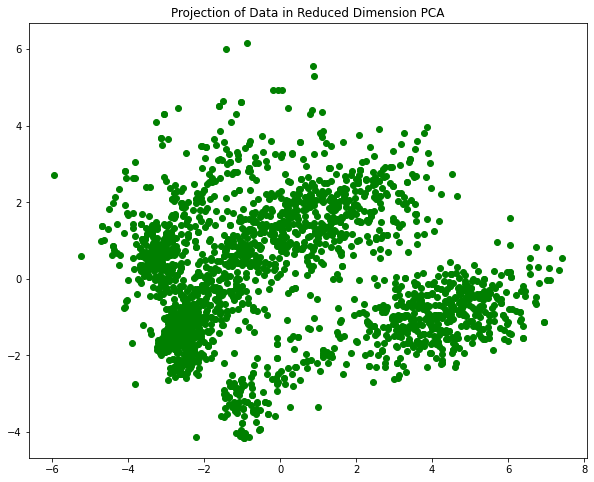

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(X, y, c="g", marker="o")
ax.set_title("Projection of Data in Reduced Dimension PCA")
plt.show()

In [ ]:
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne.fit(scaled_dup)
tsne_results = tsne.fit_transform(scaled_dup)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2212 samples in 0.000s...
[t-SNE] Computed neighbors for 2212 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2212
[t-SNE] Computed conditional probabilities for sample 2000 / 2212
[t-SNE] Computed conditional probabilities for sample 2212 / 2212
[t-SNE] Mean sigma: 1.293789
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.733940
[t-SNE] KL divergence after 300 iterations: 1.258714
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2212 samples in 0.000s...
[t-SNE] Computed neighbors for 2212 samples in 0.156s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2212
[t-SNE] Computed conditional probabilities for sample 2000 / 2212
[t-SNE] Computed conditional probabilities for sample 2212 / 2212
[t-SNE] Mean sigma: 1.293789
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.738232
[t-SNE] KL divergence after 300 iterations: 1.258049


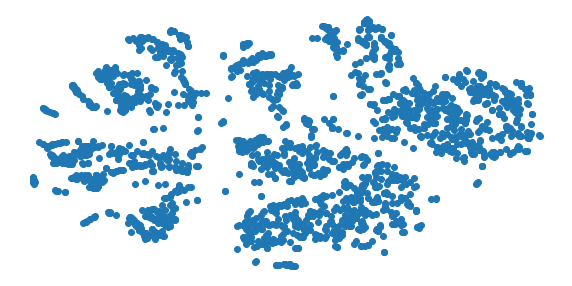

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we can observe, t-SNE did a better job when distinguishing the different clusters. Now let's explore some different clustering techniques

### K-Means Clustering

In [ ]:
ypred = pd.DataFrame()

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(scaled_dup)

X_half1, X_half2, X_tsnehalf1, X_tsnehalf2 = train_test_split(
    scaled_dup,
    X_tsne,
    test_size=0.5,
    random_state=123)

for counter, data in enumerate([
    (X_half1, X_tsnehalf1),
    (X_half2, X_tsnehalf2)]):
  
    ypred['tsne_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['tsne_f2' + '_sample' + str(counter)] = data[1][:, 1]

    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

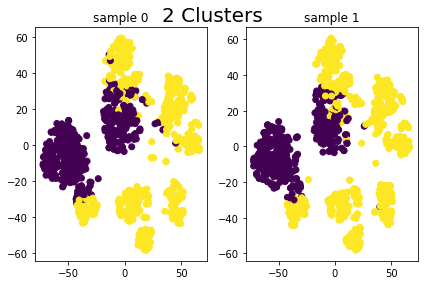

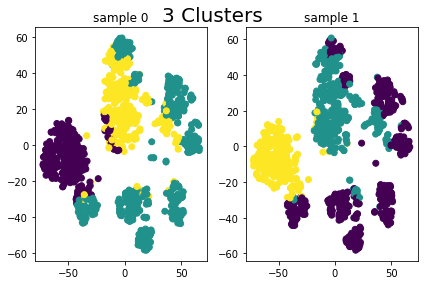

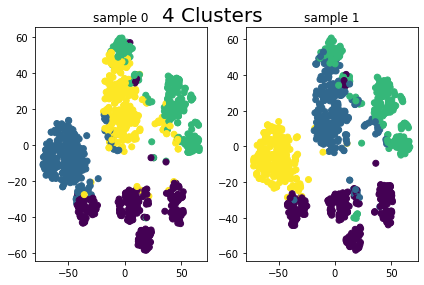

In [ ]:
for cluster in range(2, 5):
    f, axarr = plt.subplots(1, 2)

    for i in range(2):
        x_sub = ypred['tsne_f1_sample{}'.format(i)]
        y_sub = ypred['tsne_f2_sample{}'.format(i)]

        c = ypred['clust{}_sample{}'.format(cluster, i)]

        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()

    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

As we can observe from the results it is pretty consistent across all subsamples

In [ ]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_tsne)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_tsne)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_tsne)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4)))

ARI for two cluster k-means: 0.0001215615618283129
ARI for three cluster k-means: 0.0003310192941280167
ARI for four cluster k-means: 0.0005035159016470184


Based on the ARI score, the one with 4 clusters is the best solution

In [ ]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_tsne)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_tsne)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_tsne)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(X_tsne, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_tsne, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_tsne, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.4363458454608917
Silhouette score for three cluster k-means: 0.5031160116195679
Silhouette score for four cluster k-means: 0.5723825693130493


When looking at the Silhouette score, the 4 cluster is the best solution

### Agglomerative Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics

In [ ]:
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity='cosine',
                                      n_clusters=4)

clusters = agg_cluster.fit_predict(X_tsne)

# let's add the clusters feature to the original dataframe for more exploring
customer_df["Clusters"] = clusters

In [ ]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_tsne, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.00047707762772893113
The silhouette score of the Agglomerative Clustering solution: 0.4691563844680786


When comparing which clustering technique had a better solution based on ARI and Silhouette score, K-Means is a better model. Agglomerative Clustering had really close results. 
K-Means ARI (.0005067) Agglomerative Clustering ARI (.0005086)
K-Means Silhouette (.5790) Agglomerative Clustering Silhouette (.5712)

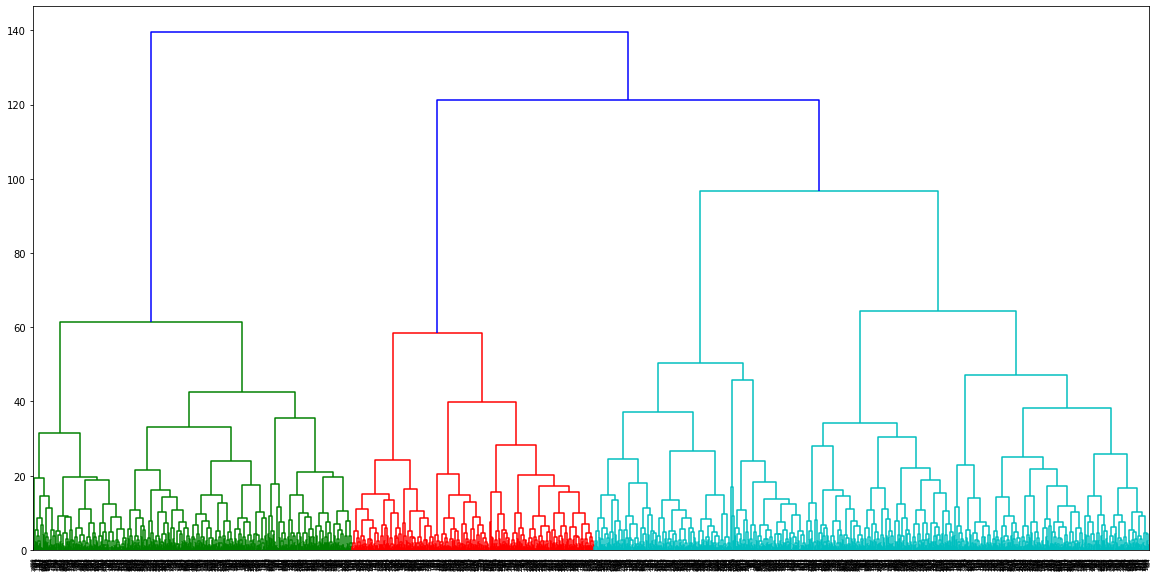

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_tsne, method='complete'))
plt.show()

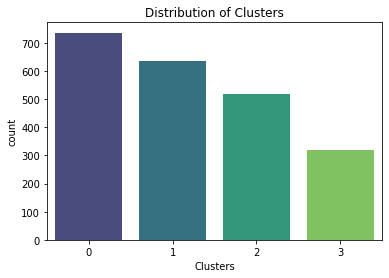

In [ ]:
pl = sns.countplot(x=customer_df["Clusters"], palette="viridis")
pl.set_title("Distribution of Clusters")
plt.show()

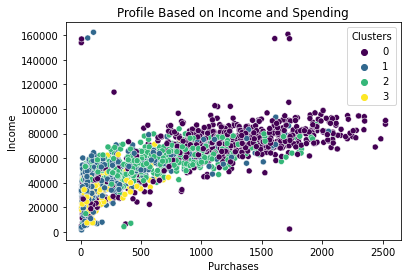

In [ ]:
pl = sns.scatterplot(data=customer_df, x=customer_df["Purchases"], y=customer_df["Income"], hue=customer_df["Clusters"],  palette="viridis")
pl.set_title("Profile Based on Income and Spending")
plt.show()

Some observations that can be made after looking at the clustering of Income vs Purchases plot


*   group 0: highest spending & highest income
*   group 1: high spending & high income
* group 2: average spending & average income
* group 3: low spending & low income



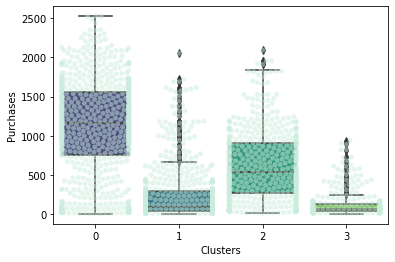

In [ ]:
plt.figure()
pl = sns.swarmplot(x=customer_df["Clusters"], y=customer_df["Purchases"], color="#CBEDDD", alpha=0.5)
pl = sns.boxplot(x=customer_df["Clusters"], y=customer_df["Purchases"], palette="viridis")
plt.show()

We can see from the plot above that Cluster 0 is the biggest set of customers followed by Cluster 2

They also provided data on promotional campaigns, let's explore those

In [ ]:
 customer_df["Total_promos"] = customer_df["AcceptedCmp1"] + customer_df["AcceptedCmp2"] + customer_df["AcceptedCmp3"] + customer_df["AcceptedCmp4"] + customer_df["AcceptedCmp5"]

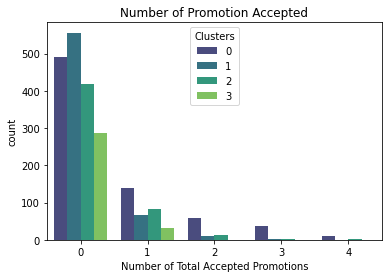

In [ ]:
plt.figure()
pl = sns.countplot(x=customer_df["Total_promos"], hue=customer_df["Clusters"], palette="viridis")
pl.set_title("Number of Promotion Accepted")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.show()

As we can observe, there are a few participants overall. A better-targeted campaign ad could boost sales and foot traffic

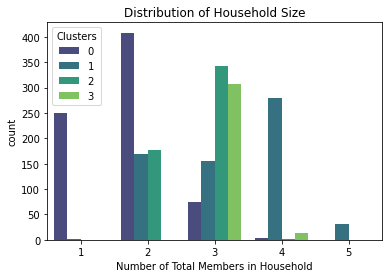

In [ ]:
plt.figure()
pl = sns.countplot(x=customer_df["Household_Size"], hue=customer_df["Clusters"], palette="viridis")
pl.set_title("Distribution of Household Size")
pl.set_xlabel("Number of Total Members in Household")
plt.show()

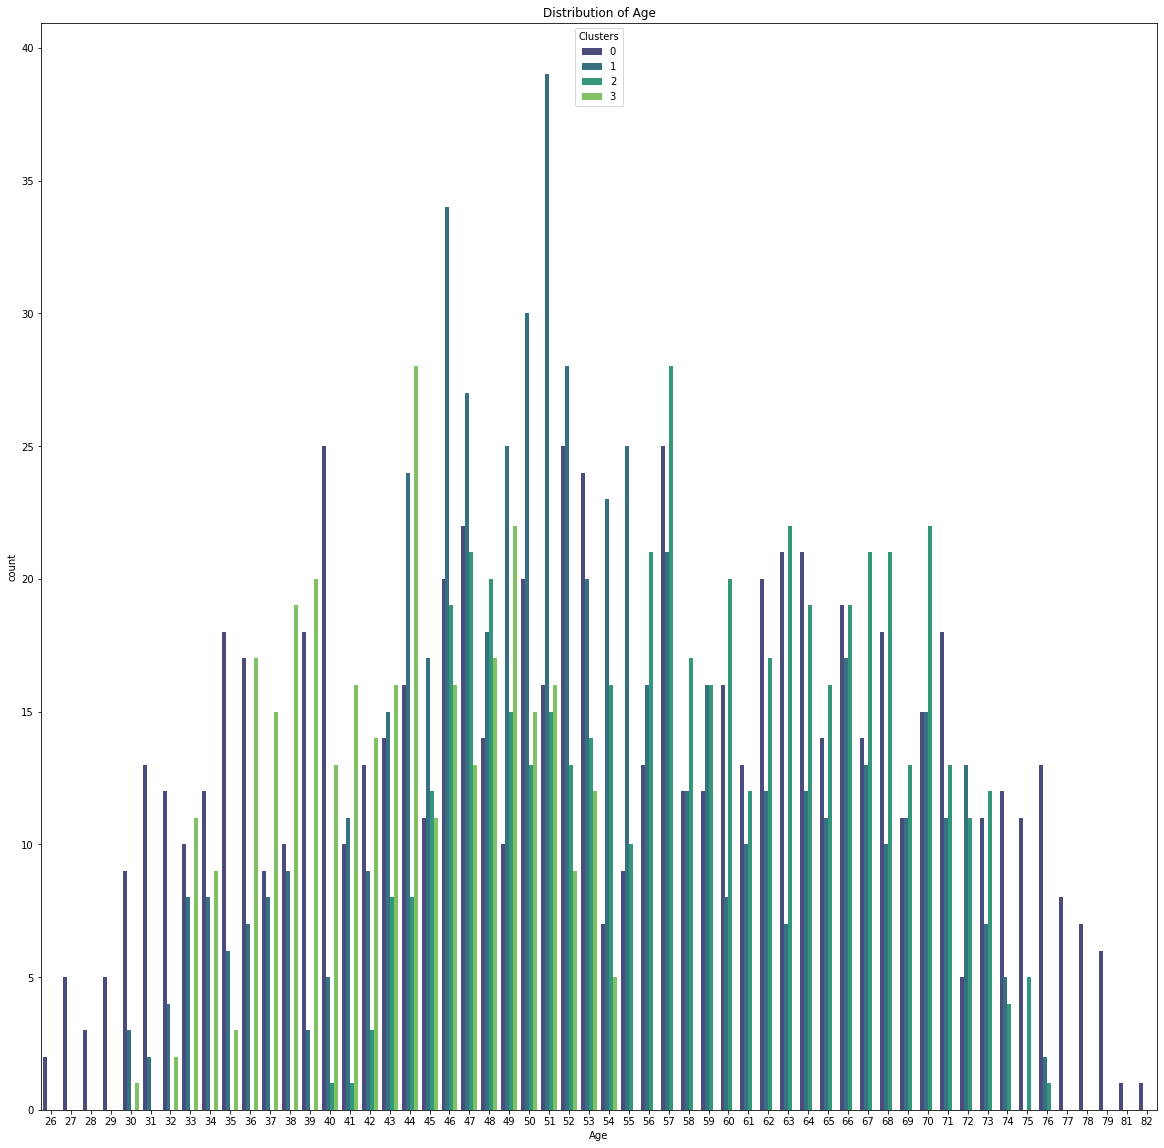

In [ ]:
plt.figure(figsize=(20,20))
pl = sns.countplot(x=customer_df["Age"], hue=customer_df["Clusters"], palette="viridis")
pl.set_title("Distribution of Age")
pl.set_xlabel("Age")
plt.show()

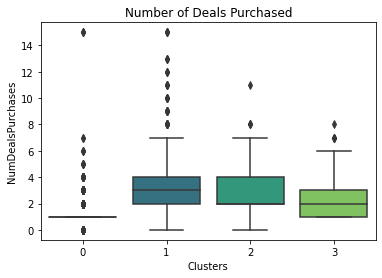

In [ ]:
plt.figure()
pl = sns.boxplot(y=customer_df["NumDealsPurchases"], x=customer_df["Clusters"], palette="viridis")
pl.set_title("Number of Deals Purchased")
plt.show()

We can see that the deals offered did well. Cluster 1 and 3 has the best outcome. However our star cluster which is Cluster 0 is not much into the deals

### Conclusion


In this project, we saw that t-sne performed better than PCA and we explored it further with different clustering techniques and found out that K-Means came out with a better solution when comparing ARI and Silhouette scores

We can make the following assumptions based on the clustering behaviors during our time exploring the data:

* group 0: Span of all ages, highest income, at the max 3 members in the family, a parent, doesn't buy much deals, single parent is a subset in this group
* group 1: Relatively older, a parent, high income group
* group 2: Relatively older, average income group
* group 3: Middle aged, low income group, at least 3 and up members in family, buys deals